# Assignment Week 1

In [1]:
import pandas as pd 
import csv
import seaborn as sns
import matplotlib.pyplot as plt

<b>Importing steps.csv and making American notation European notation.</b>

In [2]:
df1 = pd.read_csv('steps.csv', sep=';')

<b>Importing survey.csv</b>

In [3]:
df2 = pd.read_csv('survey.csv')

<b>Combine dataframes using the key 'id', because they are similar in both csv files.</b>

In [4]:
df = pd.merge(df1, df2, on = 'id')

<b>Checking outliers and cleaning data using the weight column.</b>


In [5]:
df['weight'].sort_values()

389      6.0
840     20.0
102     37.0
633     45.0
117     45.0
       ...  
549    155.0
820    155.0
43     700.0
841      NaN
923      NaN
Name: weight, Length: 929, dtype: float64

A weight lower than 45 and higher than 155 is not very likely, so I change these values to NaN.

In [6]:
df['weight'] = df['weight'].apply(pd.to_numeric, errors='coerce')

#Function which removes non plausable values
def above_or_under(x):
    if(x > 156.0) or (x < 45.0): 
        return float('NaN')
    else: 
        return x
    
#apply to all columns
df['weight'] = df['weight'].apply(above_or_under)

### The dataframe

In [7]:
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,12-5-2014,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,1129.0,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


# A plot of a time series of my choice: total steps classified by weight

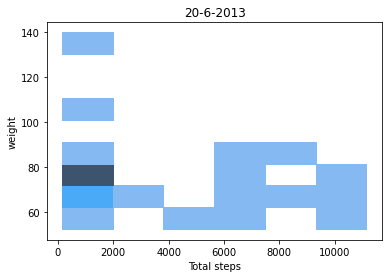

In [50]:
# selecting first day and dropping NaN values. 
steps_day = df['20-6-2013'].dropna() 

sns.histplot(data = df, x=steps_day, y='weight')
plt.title('20-6-2013')
plt.xlabel('Total steps')
plt.show()


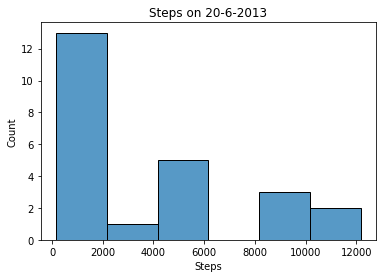

In [49]:
sns.histplot(steps_day, binwidth=2000)
plt.title('Steps on 20-6-2013')
plt.xlabel('Steps')
plt.show()

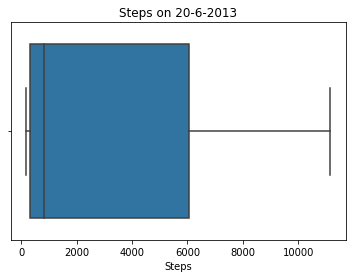

In [48]:
sns.boxplot(x=steps_day)
plt.title('Steps on 20-6-2013')
plt.xlabel('Steps')
plt.show()

## Mean

In [45]:
mean_steps = steps_day.mean().round(0)
print(mean_steps)

weight = df['weight'].dropna()
mean_weight = weight.mean().round(0)
print(mean_weight)


3642.0
72.0


## Discription
Most people have taken between 0 and 6000 steps on 20-6-2013. 

There are no outliers regarding to the boxplot. 

Only people who's weight is less than 100 took more than 2000 steps a day. 

